In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv('Mall_Customers.csv')

In [7]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
X = df.drop(columns=['CustomerID','Gender','Age'], axis=1)

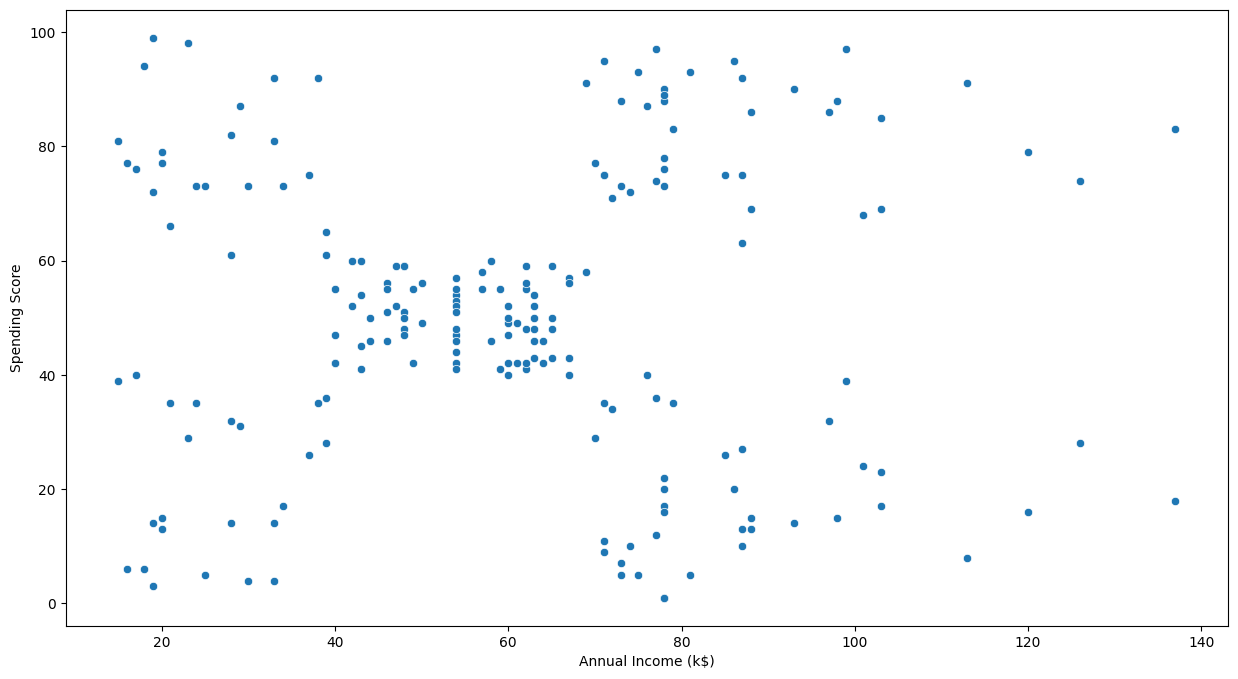

In [11]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

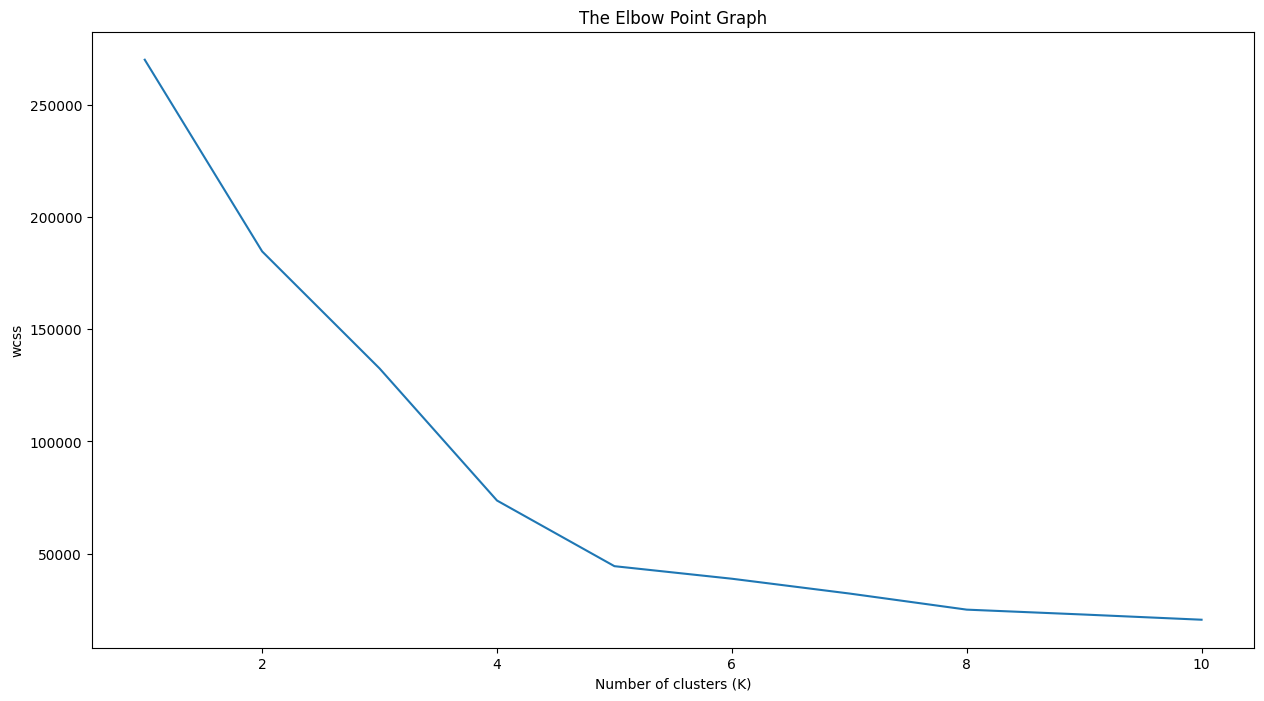

In [12]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++' ,random_state=2)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters (K)')
plt.ylabel('wcss')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

In [14]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

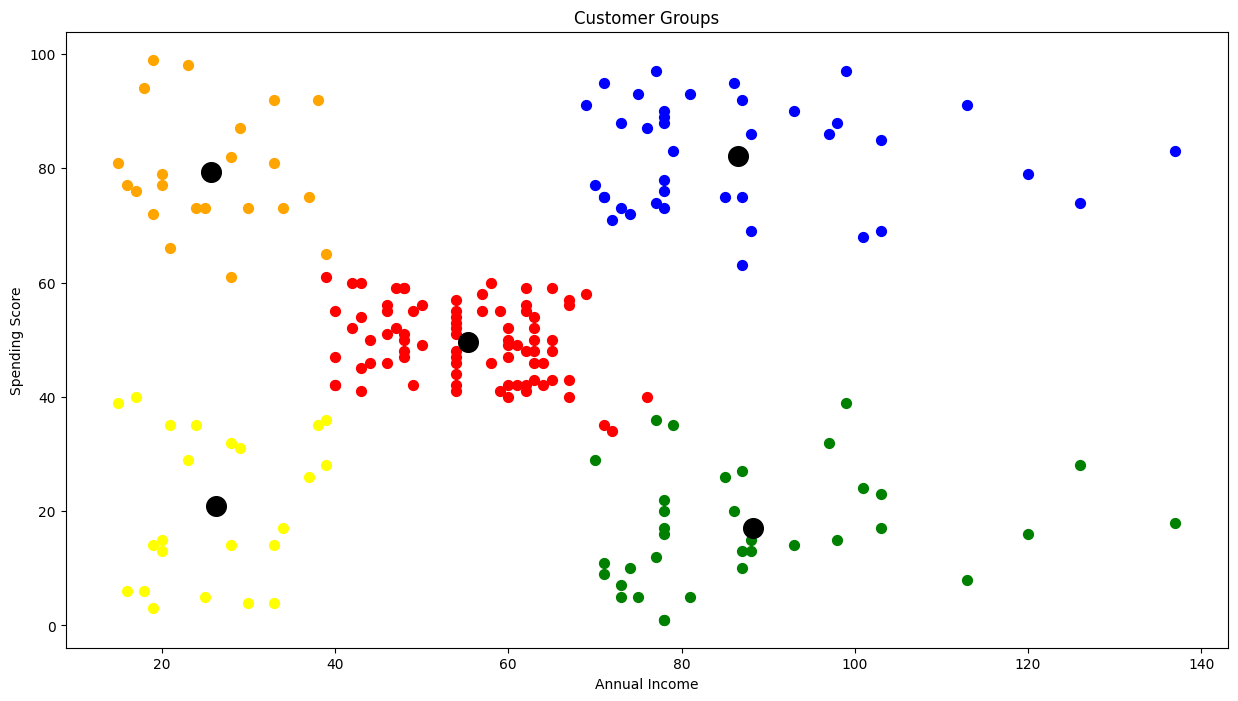

In [15]:
plt.figure(figsize=(15,8))
plt.scatter(X.iloc[Y==0,0], X.iloc[Y==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X.iloc[Y==1,0], X.iloc[Y==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X.iloc[Y==2,0], X.iloc[Y==2,1], s=50, c='green', label='Cluster 3')
plt.scatter(X.iloc[Y==3,0], X.iloc[Y==3,1], s=50, c='yellow', label='Cluster 4')
plt.scatter(X.iloc[Y==4,0], X.iloc[Y==4,1], s=50, c='orange', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='C')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()